# Introduction to Regression with Neural Networks in Tensorflow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable base on some other combination of variables, even shorter.... predicting a number.

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.6.0


## Creating a data to view and fit


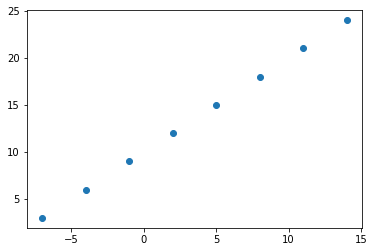

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualise it
plt.scatter(X, y)

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output shapes

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [5]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

((), ())

In [6]:
# Turn our numpy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [7]:
input_shape = X[0].shape
output_shape = X[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in modelling with TensorFlow

1. **Create a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compling the model** - define the los function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels)

In [8]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(1)
    ]
)

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # MAE is short for mean absolute error
             optimizer=tf.keras.optimizers.SGD(), # SGD is short for Stochastic Gradient Descent
             metrics=['mae']
             )

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 411ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 1000us/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 3ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 3ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 3ms/step - loss: 10.9748 - mae: 10.9748


In [9]:
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

In [10]:
y_pred + 11

array([[23.71602]], dtype=float32)

## Improving the model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compile a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [11]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(1)
    ]
)

# 2. Compile the model'
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

# 3. Fit the model (this time we will train for longer)
model.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 266ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 1ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 997us/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 1ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 998us/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0

In [12]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [13]:
# Let's see if our model's prediction has improved...
model.predict([17.0])

array([[29.739855]], dtype=float32)

In [14]:
# Exercise: change one hyperparameter and see effect on accuracy of model

# 1. Create the model (This time I have added a new dense layer with 100 units
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(50, activation=None),
        tf.keras.layers.Dense(1)
    ]
)

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['mae']
)

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 393ms/step - loss: 11.7682 - mae: 11.7682
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 11.0963 - mae: 11.0963
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 10.4150 - mae: 10.4150
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 9.7212 - mae: 9.7212
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 9.0104 - mae: 9.0104
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 8.2778 - mae: 8.2778
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 7.5198 - mae: 7.5198
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 6.9648 - mae: 6.9648
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 7.0672 - mae: 7.0672
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 7.3315 - mae: 7.3315
Epoch 11/100
1/1 [==============================] - 0s 2ms/step - loss:

In [15]:
# Let's remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [16]:
# Let's try to make a prediction
model.predict([17.0])

array([[26.583532]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you'll go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

When it comes to evaluation... there are 3 words you should memorize:
 > 'Visualize, visualize, visualize'\

It's a good idea to visulize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how does the predictions of the model line up against the ground truth (the original labels)?

In [17]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [18]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

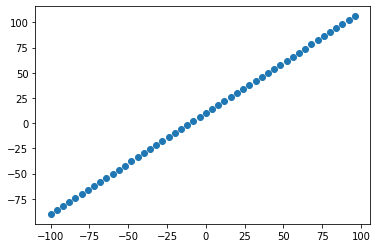

In [19]:
# Visualize the data
plt.scatter(X, y)

### The three sets...

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set** - the model get tuned on this data, which is typically 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test what it has learned, this set set is typically 10-15% of the total data available.

In [20]:
# Check the length of how many samples we have
len(X)

50

In [21]:
# Split the data into train and test sets
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

## Visualising the data
Now we've got our data in training and test sets... let's visualize it again!

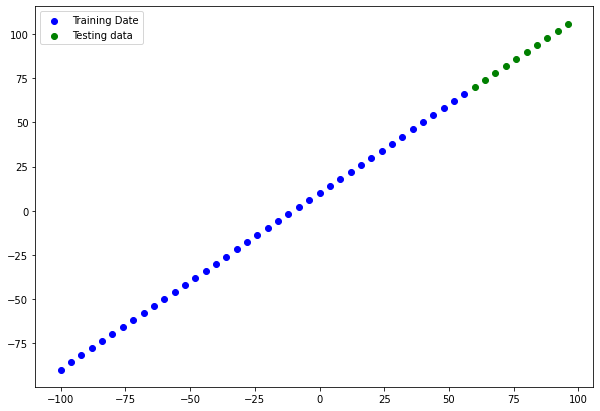

In [22]:
plt.figure(figsize=(10, 7))
# plot training date in blue
plt.scatter(X_train, y_train, c='b', label='Training Date')
plt.scatter(X_test, y_test, c='g', label='Testing data')
# show a legend
plt.legend();

In [23]:
# Let's have a look at how to build a neural network for our data

# 1. Create a mode
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(1)
    ]
)

# 2. Compile the model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics=['mae']
)

# 3. fit the model
#model.fit(X_train, y_train, epochs=100)

## Visualizing the model

In [24]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [25]:
# Let's create a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)

# Create a model (same as above)

# 1. Create a mode
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(10, input_shape=[1], name='input_layer'),
        tf.keras.layers.Dense(1, name='output_layer')
    ],
    name='model_1'
)

# 2. Compile the model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics=['mae']
)

In [26]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these aren't updated during training (this is typical when you bring in already learnt patterns or parameters from other models during **transfer learning**).

**EXERCISE:** Try playing around with the number of hidden units in the dense layer, see how that effects the number of  parameters (total and trainable) by calling ``model.summary()``

In [27]:
# 1. Create the model
model_exercise = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(50, input_shape=[1], name='input_layer'),
        tf.keras.layers.Dense(1, name='output_layer')
    ],
    name='Model_created_for_exercise'
)

# 2. Compile the model
model_exercise.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

model_exercise.build()

In [28]:
model_exercise.summary()

Model: "Model_created_for_exercise"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 50)                100       
_________________________________________________________________
output_layer (Dense)         (None, 1)                 51        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


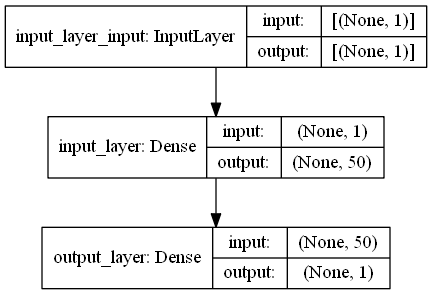

In [29]:
from tensorflow.keras.utils import plot_model

plot_model(model_exercise, show_shapes=True)

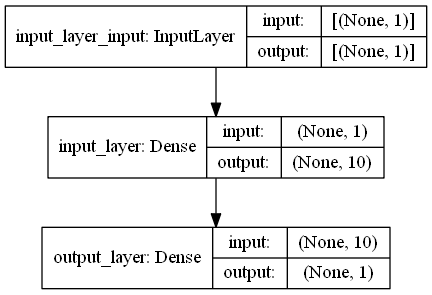

In [30]:
plot_model(model, show_shapes=True)

In [31]:
model.fit(X_train, y_train, epochs=100, verbose=0)

## Visualising a model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus model's predictions).

In [32]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred.T,y_test

(array([[ 70.5522  ,  75.13993 ,  79.727646,  84.31538 ,  88.90311 ,
          93.49083 ,  98.07855 , 102.66628 , 107.254   , 111.84173 ]],
       dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>)

In [33]:
# Let's create a plotting function
def plot_predictions(
        train_data=X_train,
        train_labels=y_train,
        test_data=X_test,
        test_labels=y_test,
        predictions=y_pred):
    """
    plots training data, test data and compares predictions to ground truth labels
    """
    plt.figure(figsize=(10,7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c='b', label='Training data')

    # Plot test data in green
    plt.scatter(test_data, test_labels, c='g', label='Testing data')

    # Plot model's predictions in red
    plt.scatter(test_data, predictions, c='r', label='Predictions')

    # Show legend
    plt.legend();

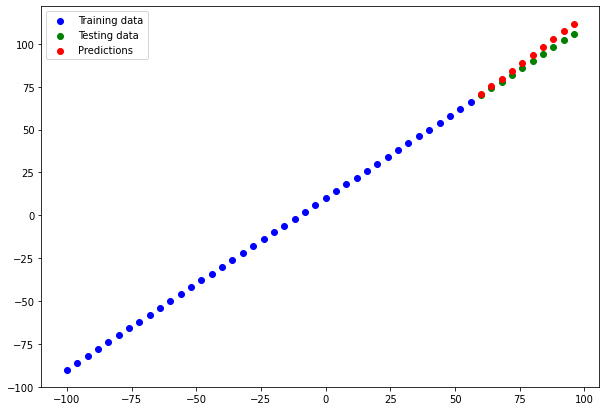

In [34]:
plot_predictions(
        train_data=X_train,
        train_labels=y_train,
        test_data=X_test,
        test_labels=y_test,
        predictions=y_pred)

## Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, 'on average, how wrong is each of my model's predictions'
* MSE - mean square error, 'square the average errors'

In [35]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 164ms/step - loss: 3.1970 - mae: 3.1970


[3.196964979171753, 3.196964979171753]

In [36]:
# Calculate the mean absolute error
tf.keras.losses.mae(y_test, y_pred.T)

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([3.196965], dtype=float32)>

In [37]:
# Calculate the mean square error
tf.keras.losses.mean_squared_error(y_test, y_pred.T)

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([13.070308], dtype=float32)>

In [38]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
    return tf.keras.losses.mae(y_true=y_true,y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
    return tf.keras.losses.mean_squared_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

## Running experiments to improve our model

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:
1. `model_1` - same as original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.
4. `model_4` - TBC

**Build `model_1`**

In [77]:
# 1. Create the model
model_1 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(1, input_shape=[1], name='Input_Layer'),
    ],
    name='Model_1'
)

# 2. Compile the model
model_1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

# 3. Fit the model
model_1.fit(X_train, y_train, epochs=100, verbose=0)

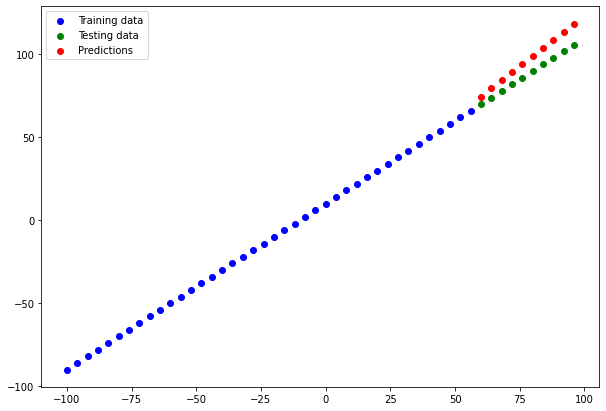

In [78]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)

plot_predictions(predictions=y_preds_1)

In [79]:
# Calculate model_1 evalution metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=8.647593>,
 <tf.Tensor: shape=(), dtype=float32, numpy=81.30821>)

In [80]:
model_1.evaluate(X_test, y_test)

y_pred = model_1.predict(X_test)

print(mae(y_pred=y_pred, y_true=y_test))
print(mse(y_pred=y_pred, y_true=y_test))

1/1 [==============================] - 0s 106ms/step - loss: 8.6476 - mae: 8.6476
tf.Tensor(8.647593, shape=(), dtype=float32)
tf.Tensor(81.30821, shape=(), dtype=float32)


**Build `model_2`**

* 2 dense layers, trained for 100 epochs

In [81]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(10, input_shape=[1], name='Input_Layer'),
        tf.keras.layers.Dense(1, name='Output_Layer')
    ],
    name='Model_2'
)

# 2. Compile the model
model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mse']
)

# 3. Fit the model
model_2.fit(X_train, y_train, epochs=100, verbose=0)

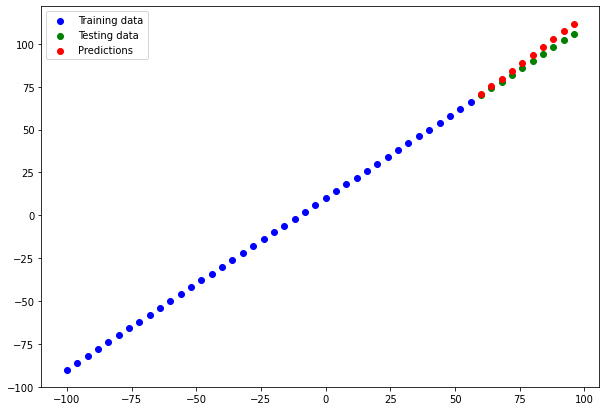

In [82]:
# Make and plot predictions of model_2
y_preds_2 = model_2.predict(X_test)

plot_predictions(predictions=y_preds_2)

In [83]:
# Calculate model_2 evalution metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.196965>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070308>)

In [84]:
model_2.evaluate(X_test, y_test)

y_pred = model_2.predict(X_test)

print(mae(y_pred=y_pred, y_true=y_test))
print(mse(y_pred=y_pred, y_true=y_test))

1/1 [==============================] - 0s 111ms/step - loss: 3.1970 - mse: 13.0703
tf.Tensor(3.196965, shape=(), dtype=float32)
tf.Tensor(13.070308, shape=(), dtype=float32)


**Build `model_3`**

* 2 dense layers trained for 500 epochs

In [85]:
# Set random set
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(10, input_shape=[1], name='Input_Layer'),
        tf.keras.layers.Dense(1, name='Output_Layer')
    ],
    name='Model_3'
)

# 2. Compile the model
model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

# 3. Fit the model
model_3.fit(X_train, y_train, epochs=500, verbose=0)

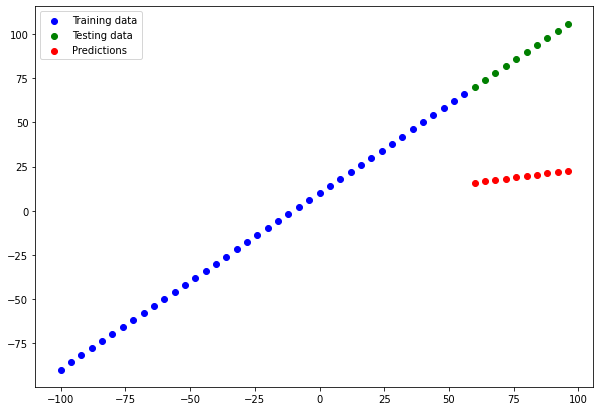

In [86]:
# Make and plot predictions
y_preds_3 = model_3.predict(X_test)

plot_predictions(predictions=y_preds_3)

In [87]:
# Calculate model_3 evalution metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0283>)

In [88]:
model_3.evaluate(X_test, y_test)

y_pred = model_3.predict(X_test)

print(mae(y_pred=y_pred, y_true=y_test))
print(mse(y_pred=y_pred, y_true=y_test))

1/1 [==============================] - 0s 103ms/step - loss: 68.7136 - mae: 68.7136
tf.Tensor(68.713615, shape=(), dtype=float32)
tf.Tensor(4808.0283, shape=(), dtype=float32)


## Comparing the results of our experiments

We've run a few experiments, now lets compare the results.

In [91]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [
    ['model_1', mae_1.numpy(), mse_1.numpy()],
    ['model_2', mae_2.numpy(), mse_2.numpy()],
    ['model_3', mae_3.numpy(), mse_3.numpy()]
]

all_results = pd.DataFrame(model_results, columns=['Models', 'mae', 'mse'])
all_results

,Models,mae,mse
0,model_1,8.647593,81.308212
1,model_2,3.196965,13.070308
2,model_3,68.713615,4808.028320


Looks like `model_2` preformed the best..

In [92]:
model_2.summary()

Model: "Model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (Dense)          (None, 10)                20        
_________________________________________________________________
Output_Layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


> **Note:** one of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what dos work. Remember the machine learning practioner's motto: "experiment, experiment, experiment".

## Tracking your experiments

One good habit in machine learning modelling is to track the results of your experiments.

and when doing soe, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

** Resource ** As you build more models, you'll want to look into using:

* TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll see this one later).
* Weights and Biases - a tool for tracking all kinds of machine learning experiments (plugs straight into TensorBoard)

## Saving our models

Saving our models allows us to use them outside of google colab (or wherever they were trained) such as in a web application or a mobile app.

There are two main formats we can save our model's too:

1. The SavedModel format
2. The HDF5 format

In [95]:
# Save a model using the SavedModel Format
model_2.save('Model_2-section1_SavedModel_format')

INFO:tensorflow:Assets written to: Model_2-section1_SavedModel_format\assets


INFO:tensorflow:Assets written to: Model_2-section1_SavedModel_format\assets


In [96]:
# Save model using the HDF5 format
model_2.save('Model_2-section1_HDF5_format.h5')